<a href="https://colab.research.google.com/github/mlkbrv/MachineLearningPorjects/blob/main/RandomForestRegressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/rock_density_xray.csv")

In [ ]:
df.head()

,Rebound Signal Strength nHz,Rock Density kg/m3
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


In [ ]:
df.columns = ["Signal","Density"]

<Axes: xlabel='Signal', ylabel='Density'>

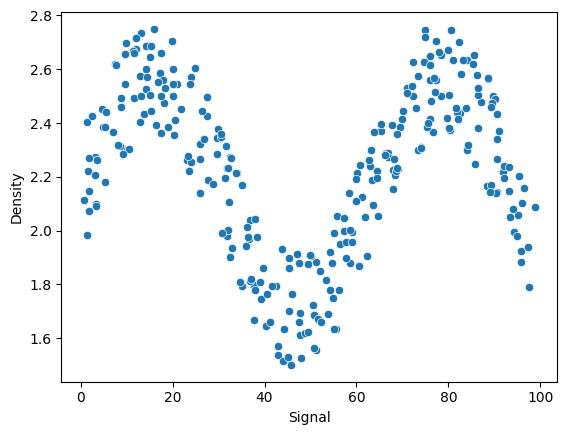

In [ ]:
sns.scatterplot(x="Signal",y="Density",data=df)

In [ ]:
X = df["Signal"].values.reshape(-1,1)

In [ ]:
y = df["Density"]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,random_state=101)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr_model = LinearRegression()

In [ ]:
lr_model.fit(X_train,y_train)

LinearRegression()

In [ ]:
lr_pred = lr_model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [ ]:
mean_absolute_error(y_test,lr_pred)

0.211198973318633

In [ ]:
np.sqrt(mean_squared_error(y_test,lr_pred))

np.float64(0.2570051996584629)

In [ ]:
signal_range = np.arange(0,100)

In [ ]:
signal_preds = lr_model.predict(signal_range.reshape(-1,1))

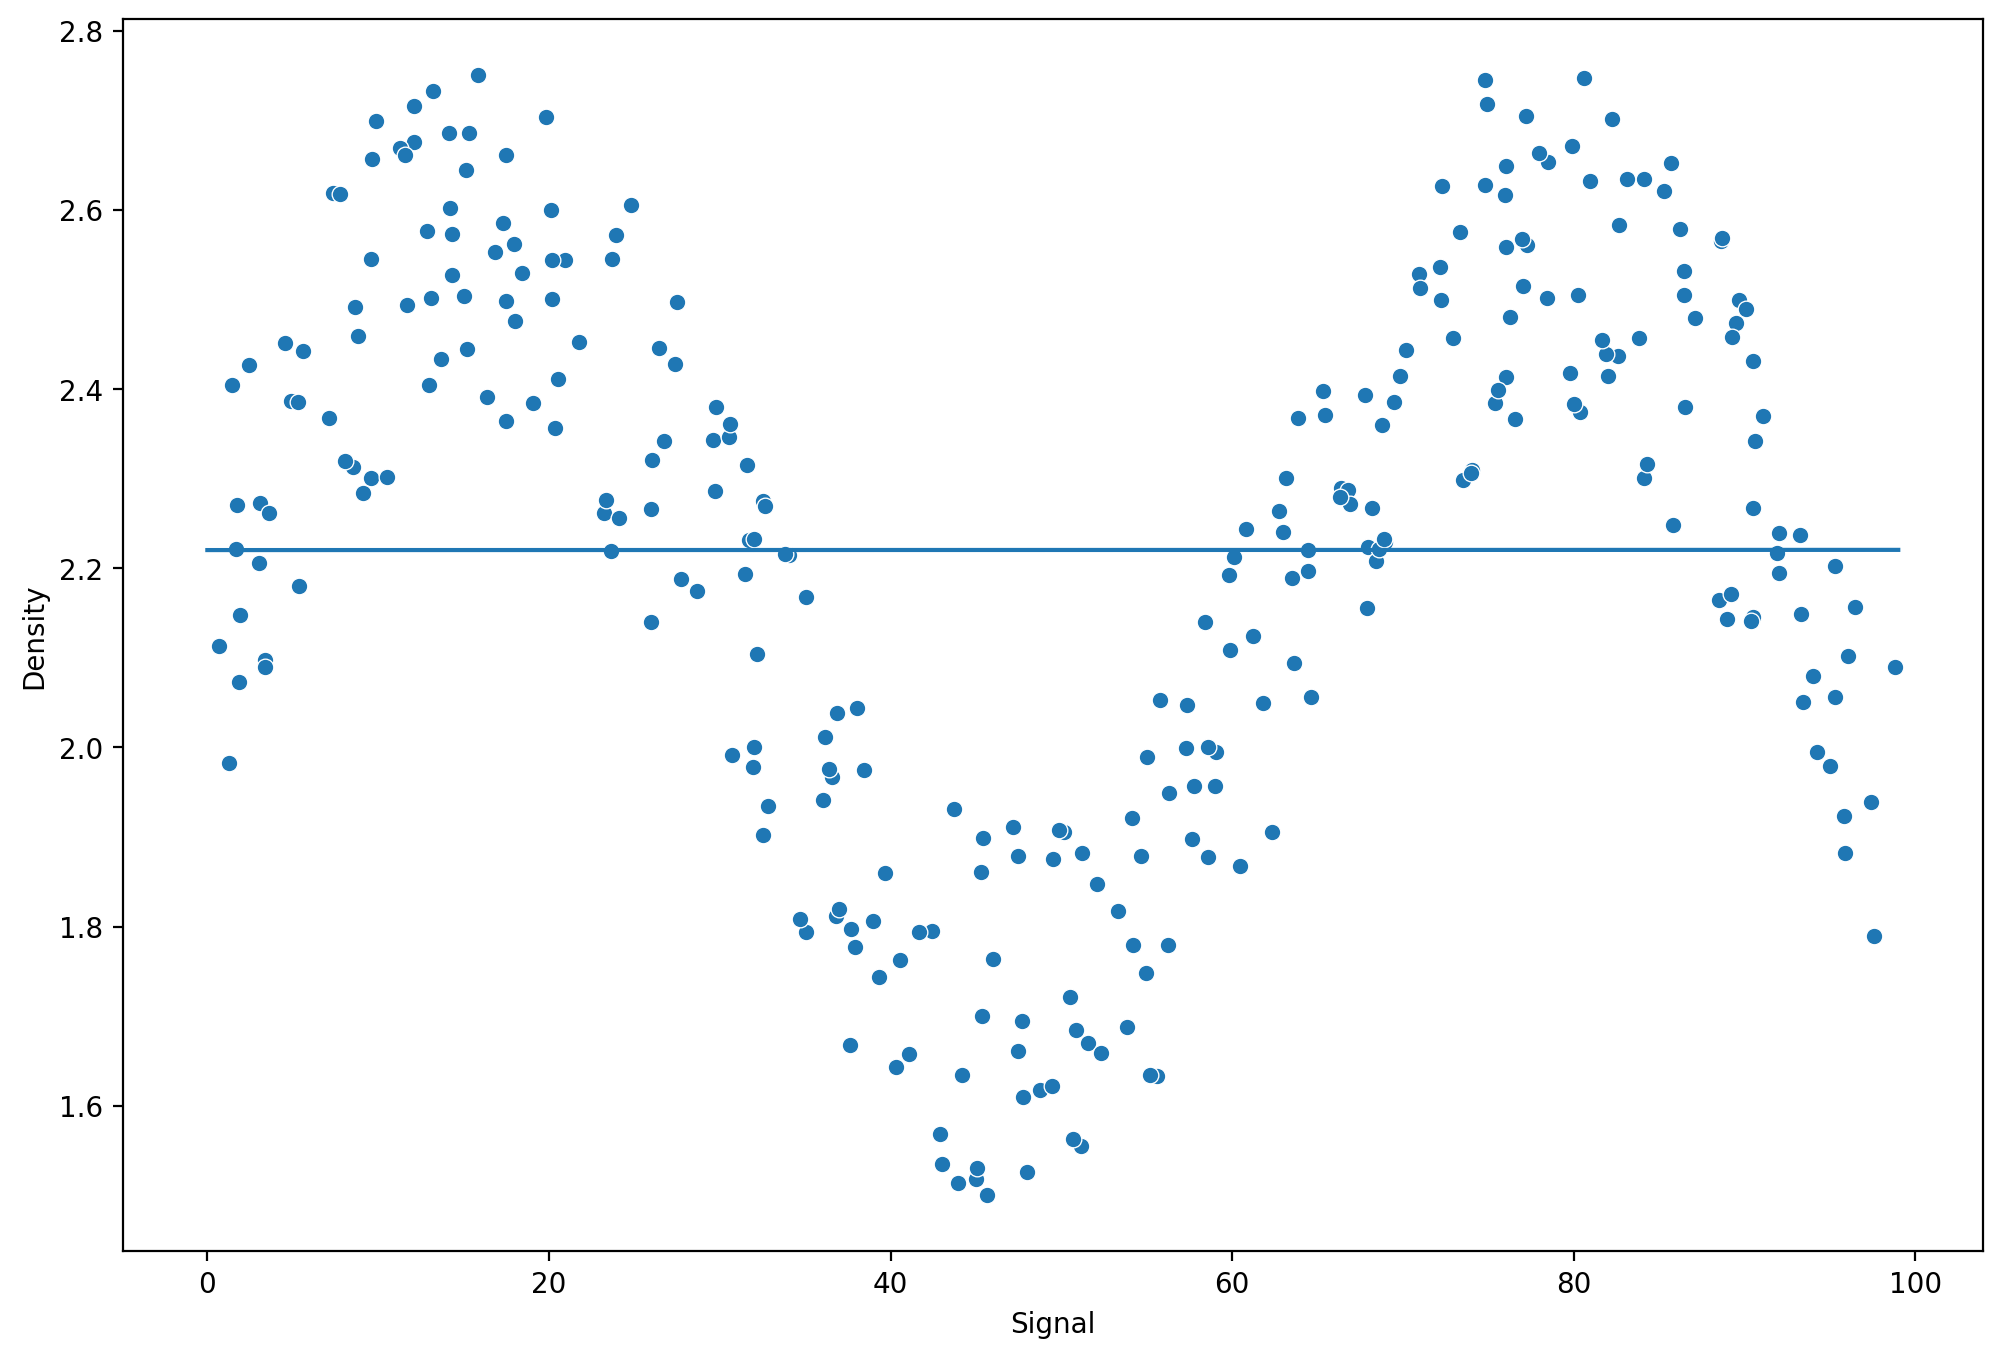

In [ ]:
plt.figure(figsize=(12,8),dpi=200)
sns.scatterplot(x="Signal",y="Density",data=df)
plt.plot(signal_range,signal_preds)

In [ ]:
def run_model(model,X_train,y_train,X_test,y_test):
  model.fit(X_train,y_train)
  pred = model.predict(X_test)
  rmse = np.sqrt(mean_squared_error(y_test,pred))
  mae = mean_absolute_error(y_test,pred)
  print(f"RMSE: {rmse}")
  print(f"MAE: {mae}")

  signal_range = np.arange(0,100)
  signal_preds=model.predict(signal_range.reshape(-1,1))
  plt.figure(figsize=(12,8),dpi=200)
  sns.scatterplot(x="Signal",y="Density",data=df,color="black")
  plt.plot(signal_range,signal_preds)

RMSE: 0.2570051996584629
MAE: 0.211198973318633


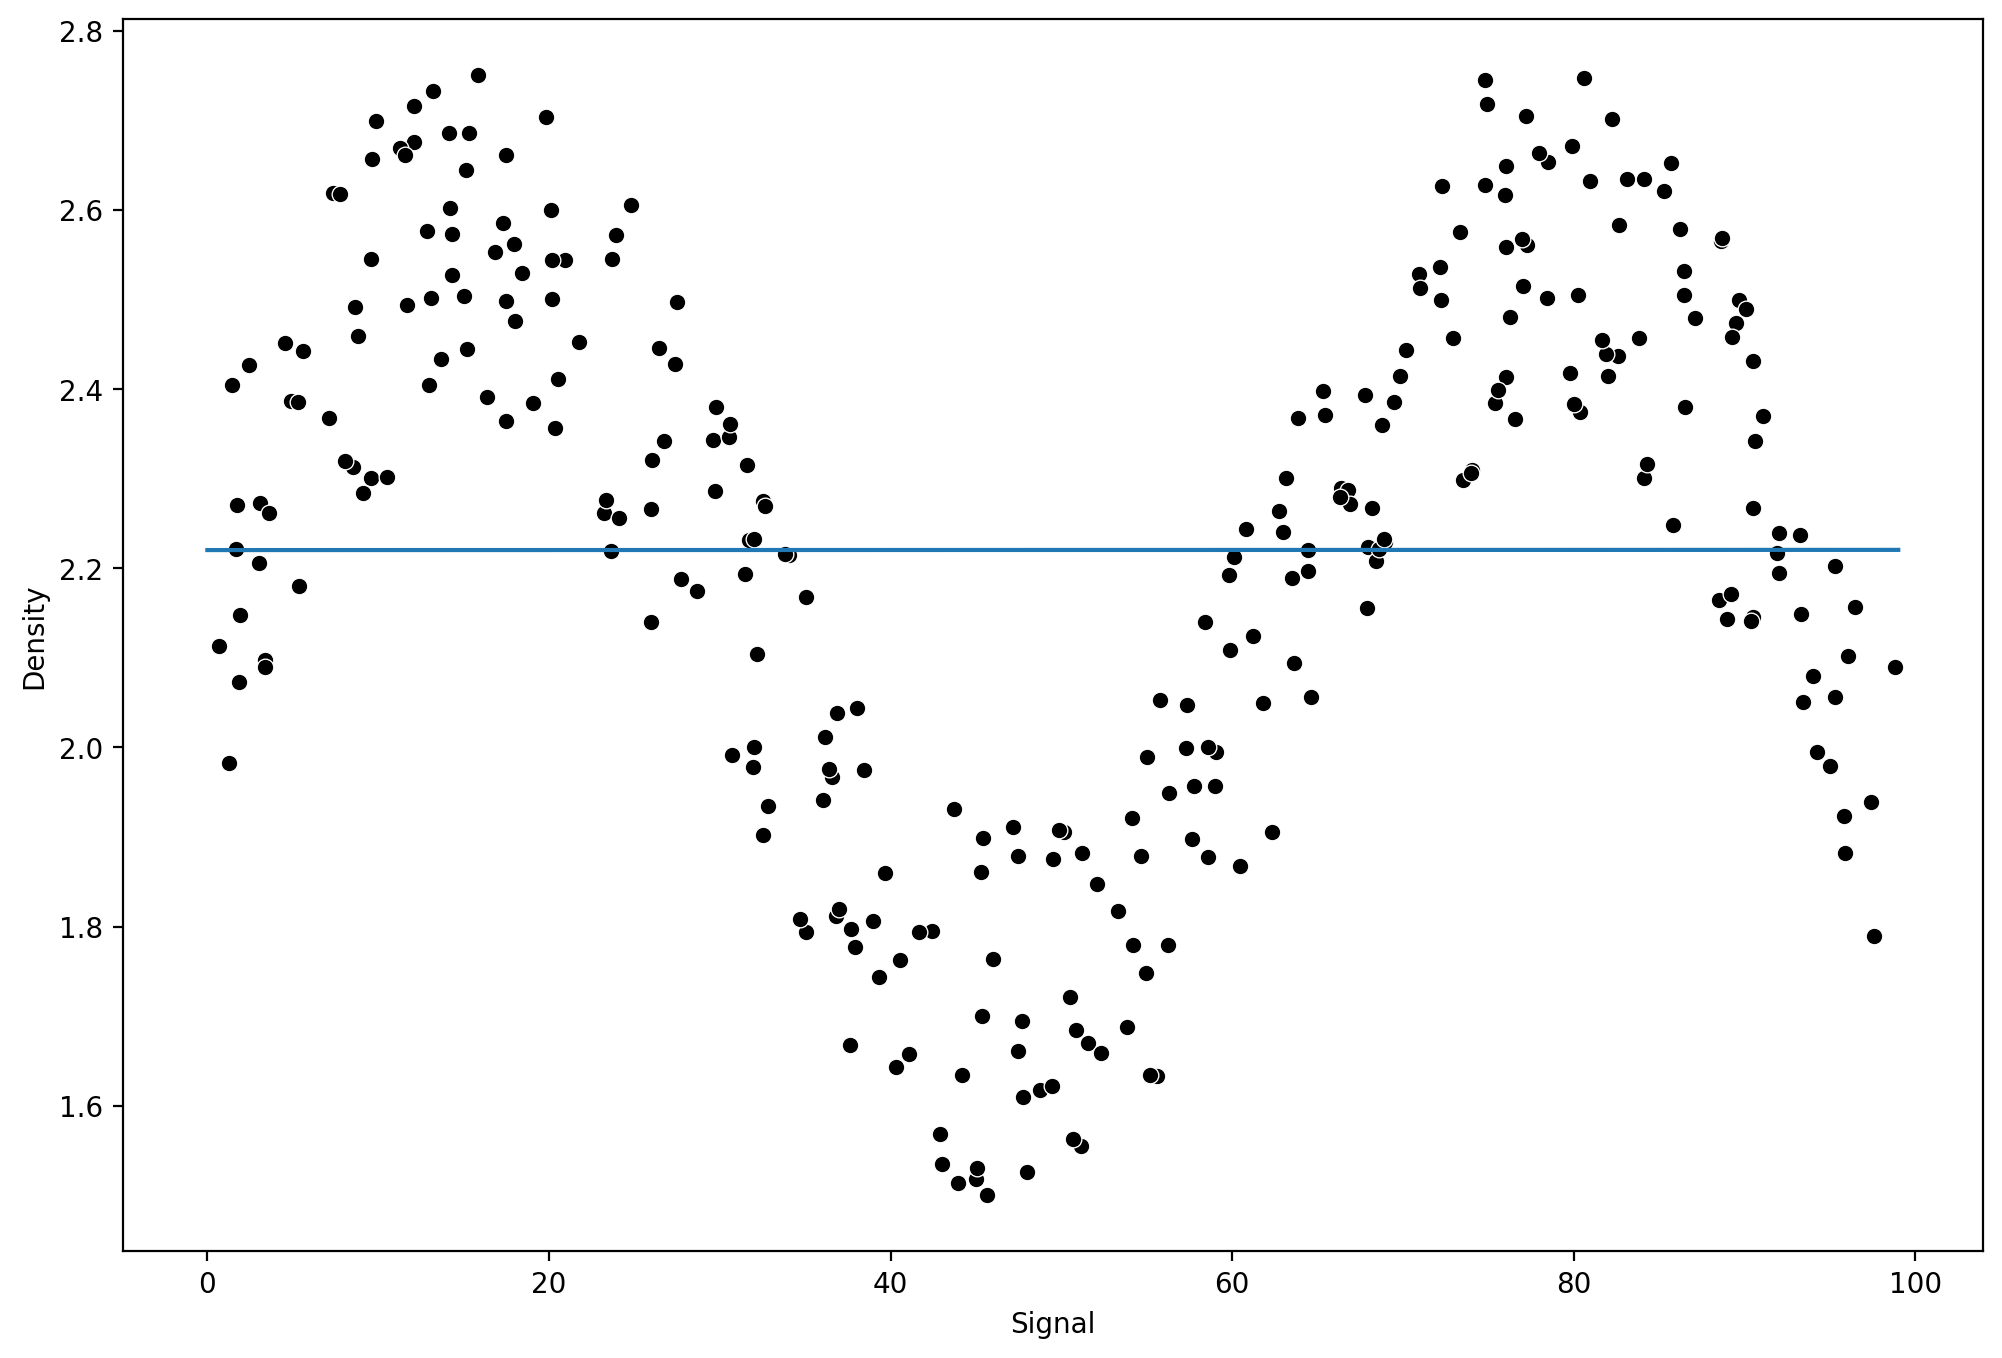

In [ ]:
model = LinearRegression()
run_model(model,X_train,y_train,X_test,y_test)

In [ ]:
from sklearn.pipeline import make_pipeline

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

RMSE: 0.1626900529299545
MAE: 0.14338577194053312


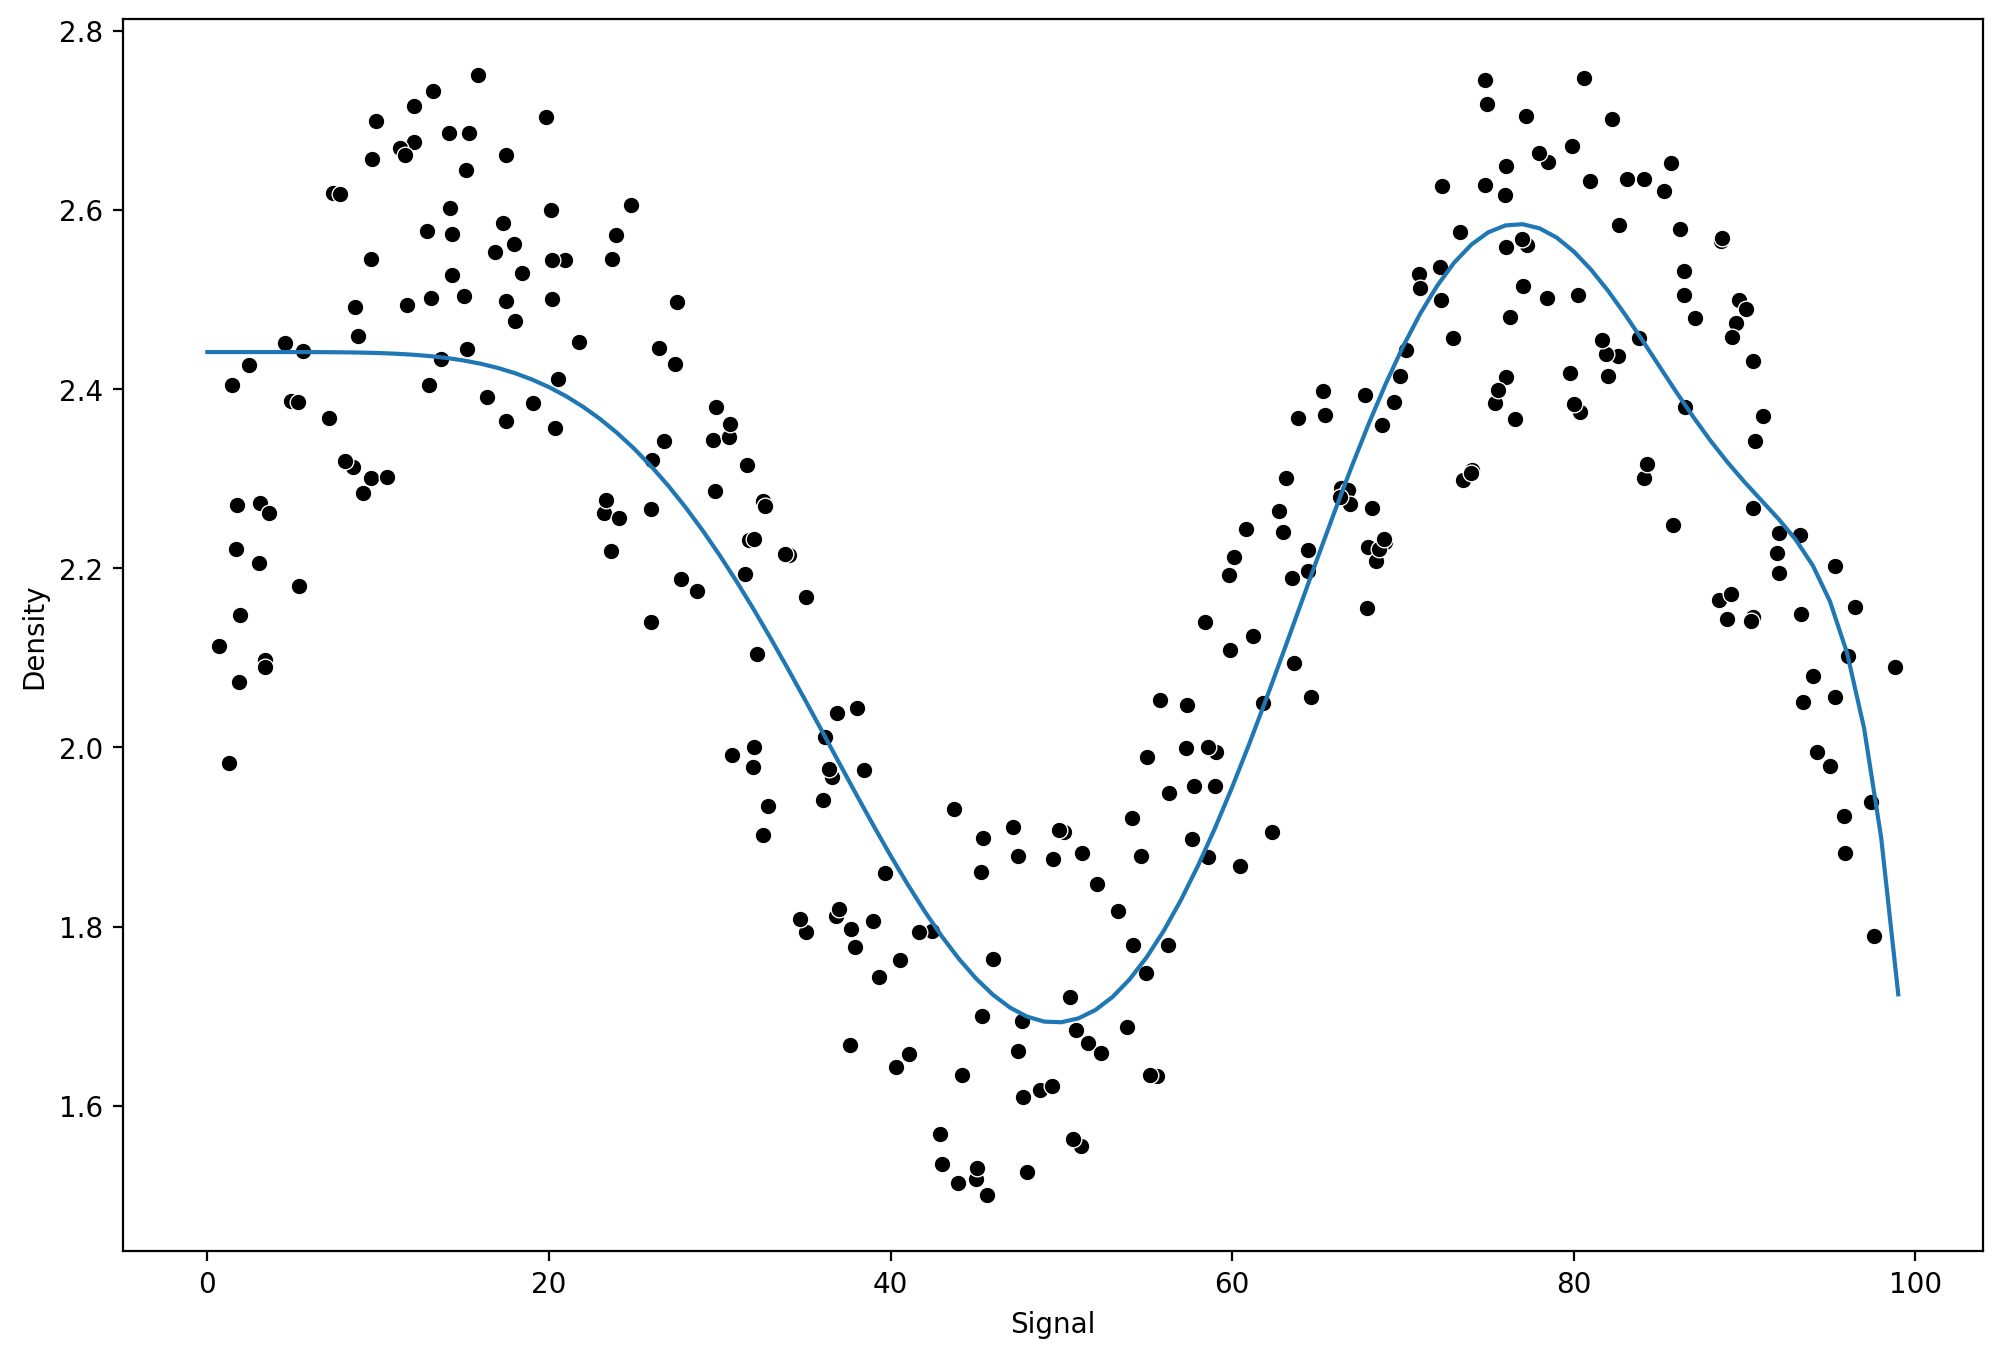

In [ ]:
pipe = make_pipeline(PolynomialFeatures(degree=10),LinearRegression())
run_model(pipe,X_train,y_train,X_test,y_test)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

RMSE: 0.1523487028635337
MAE: 0.11877297474442378
RMSE: 0.13277855732740926
MAE: 0.11635971693292672
RMSE: 0.1397499127378895
MAE: 0.1207030971917154


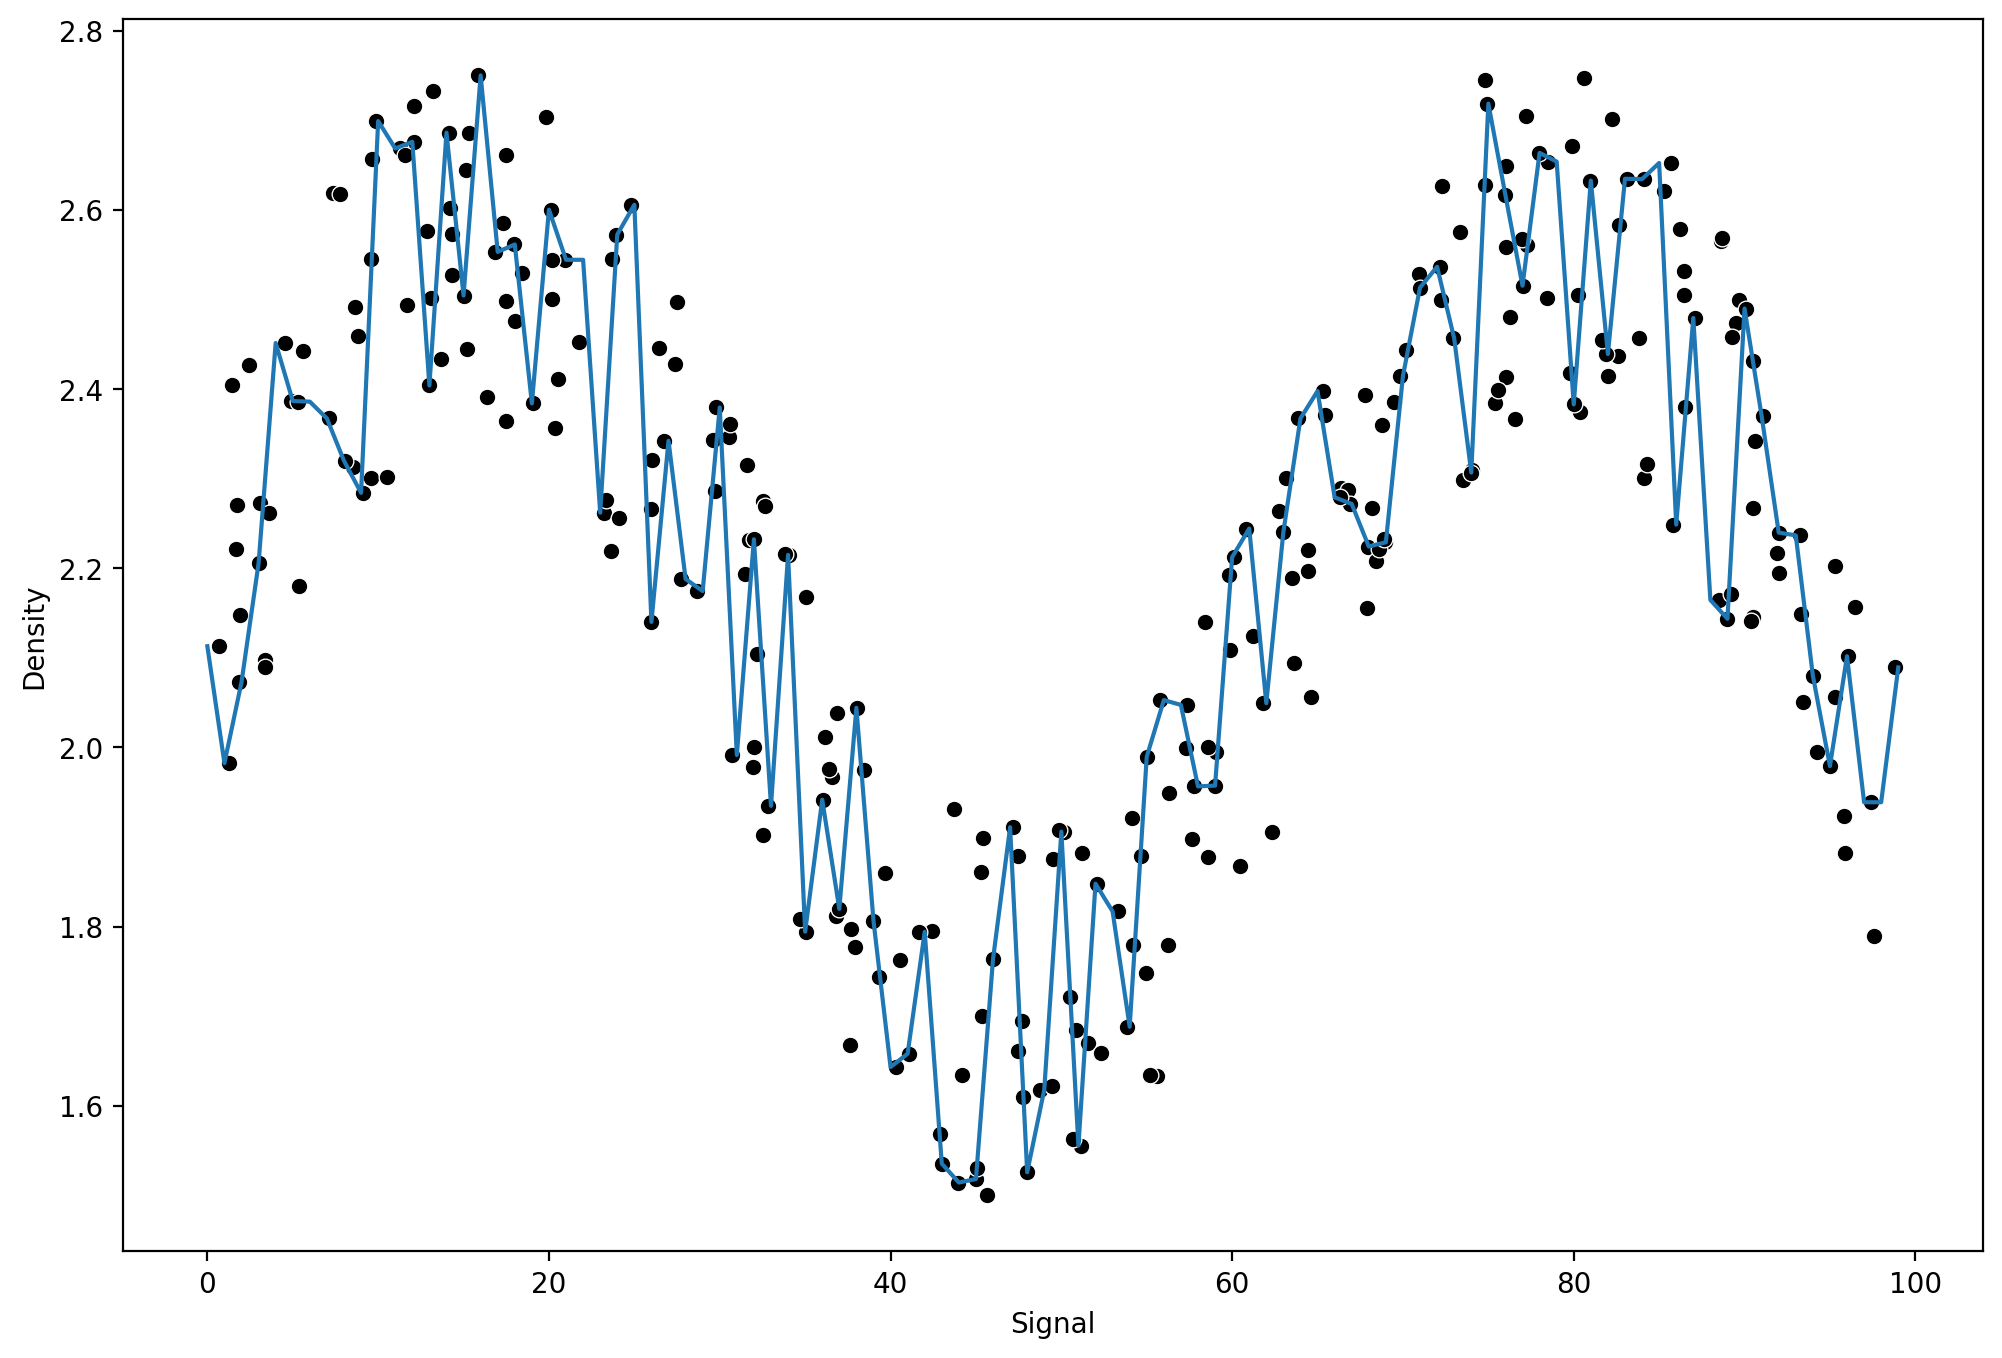

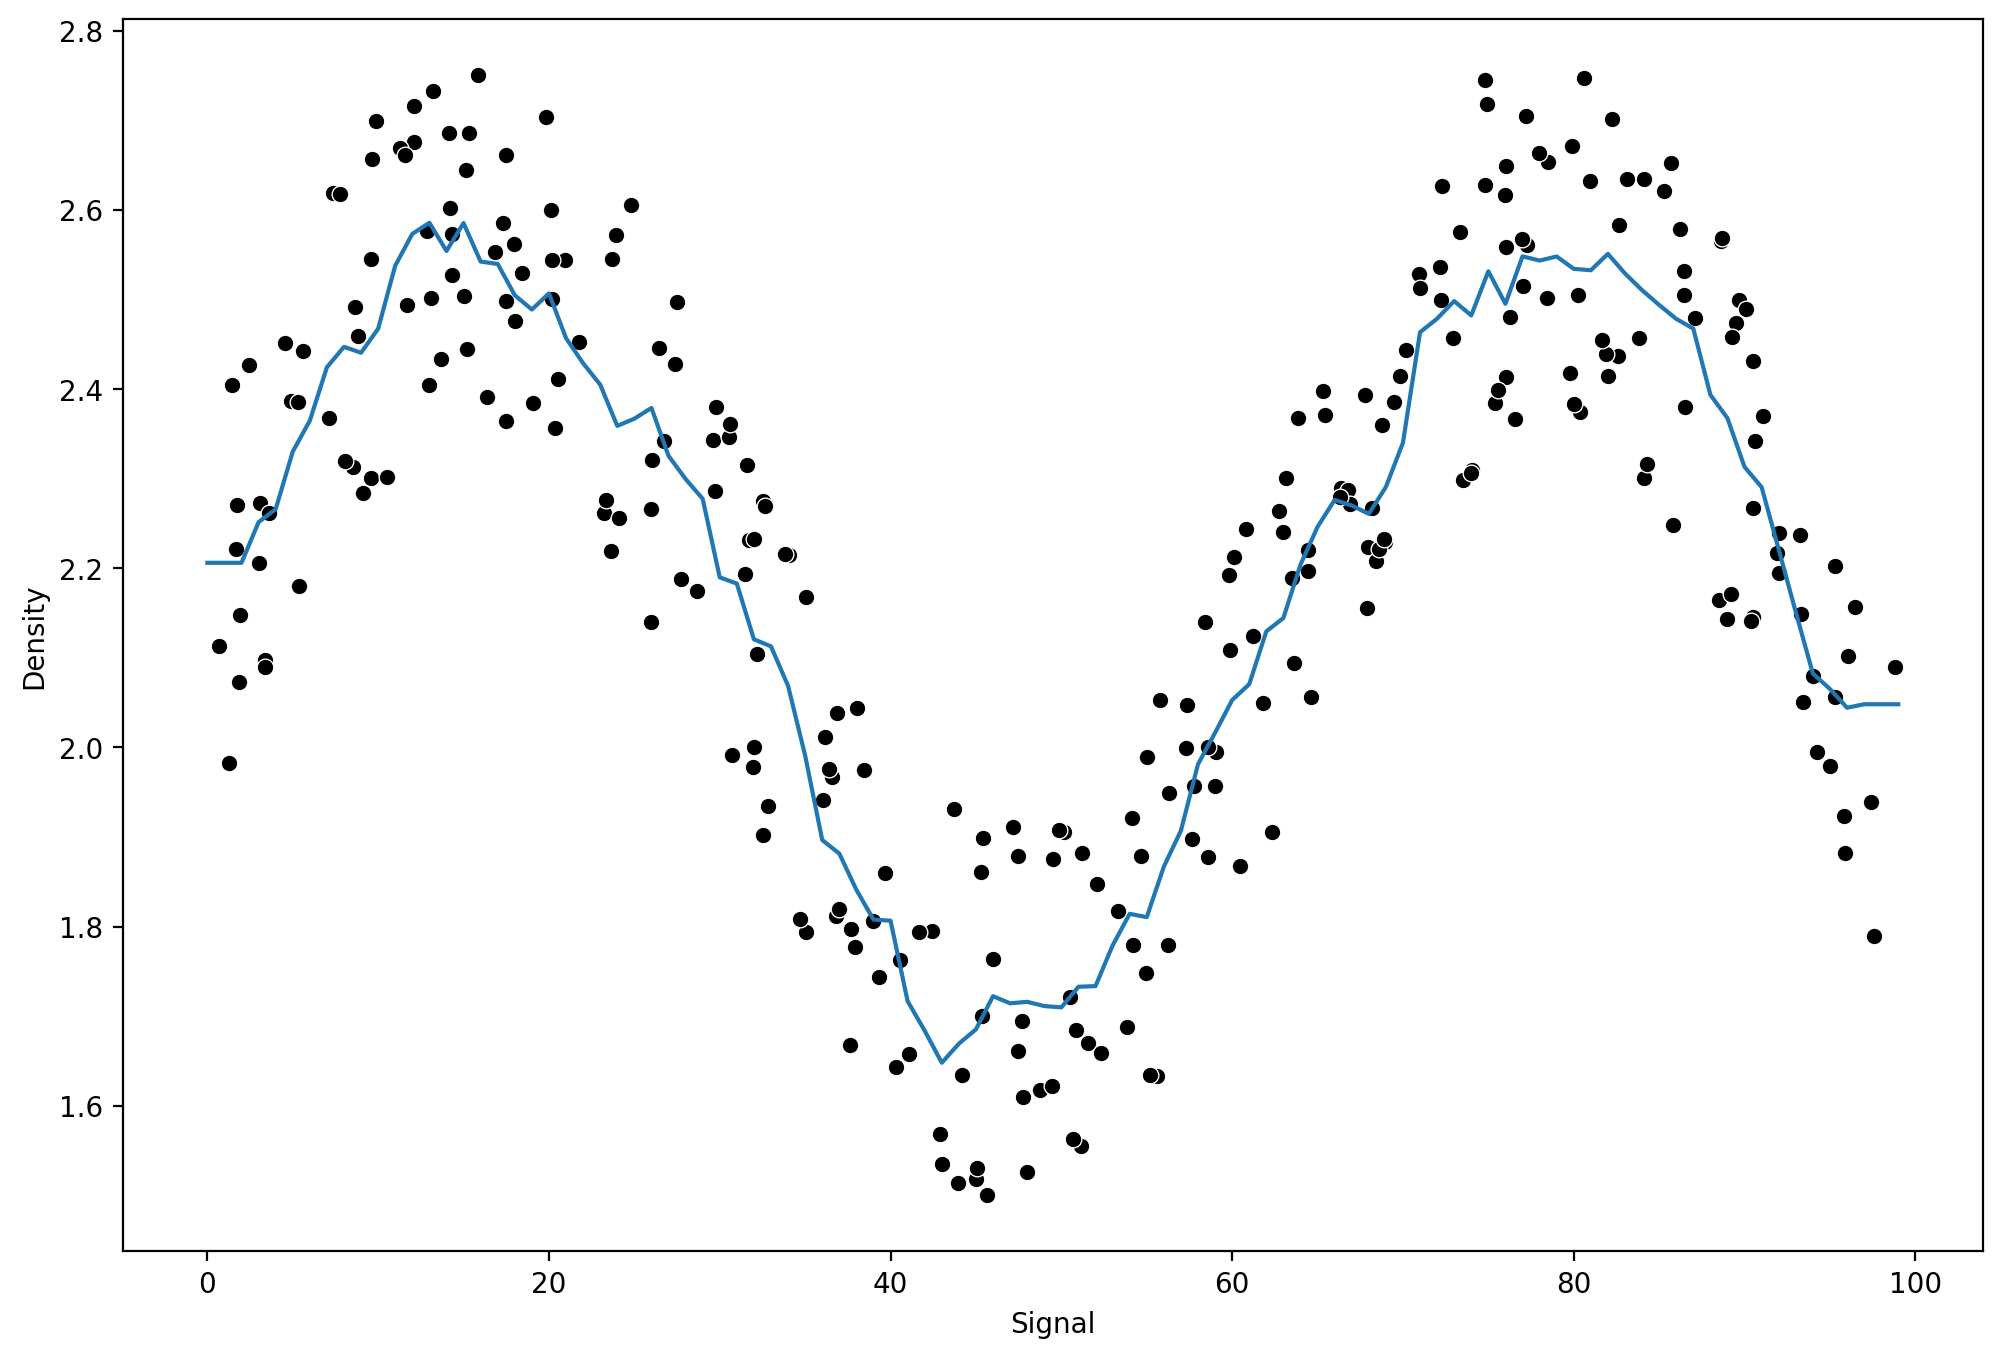

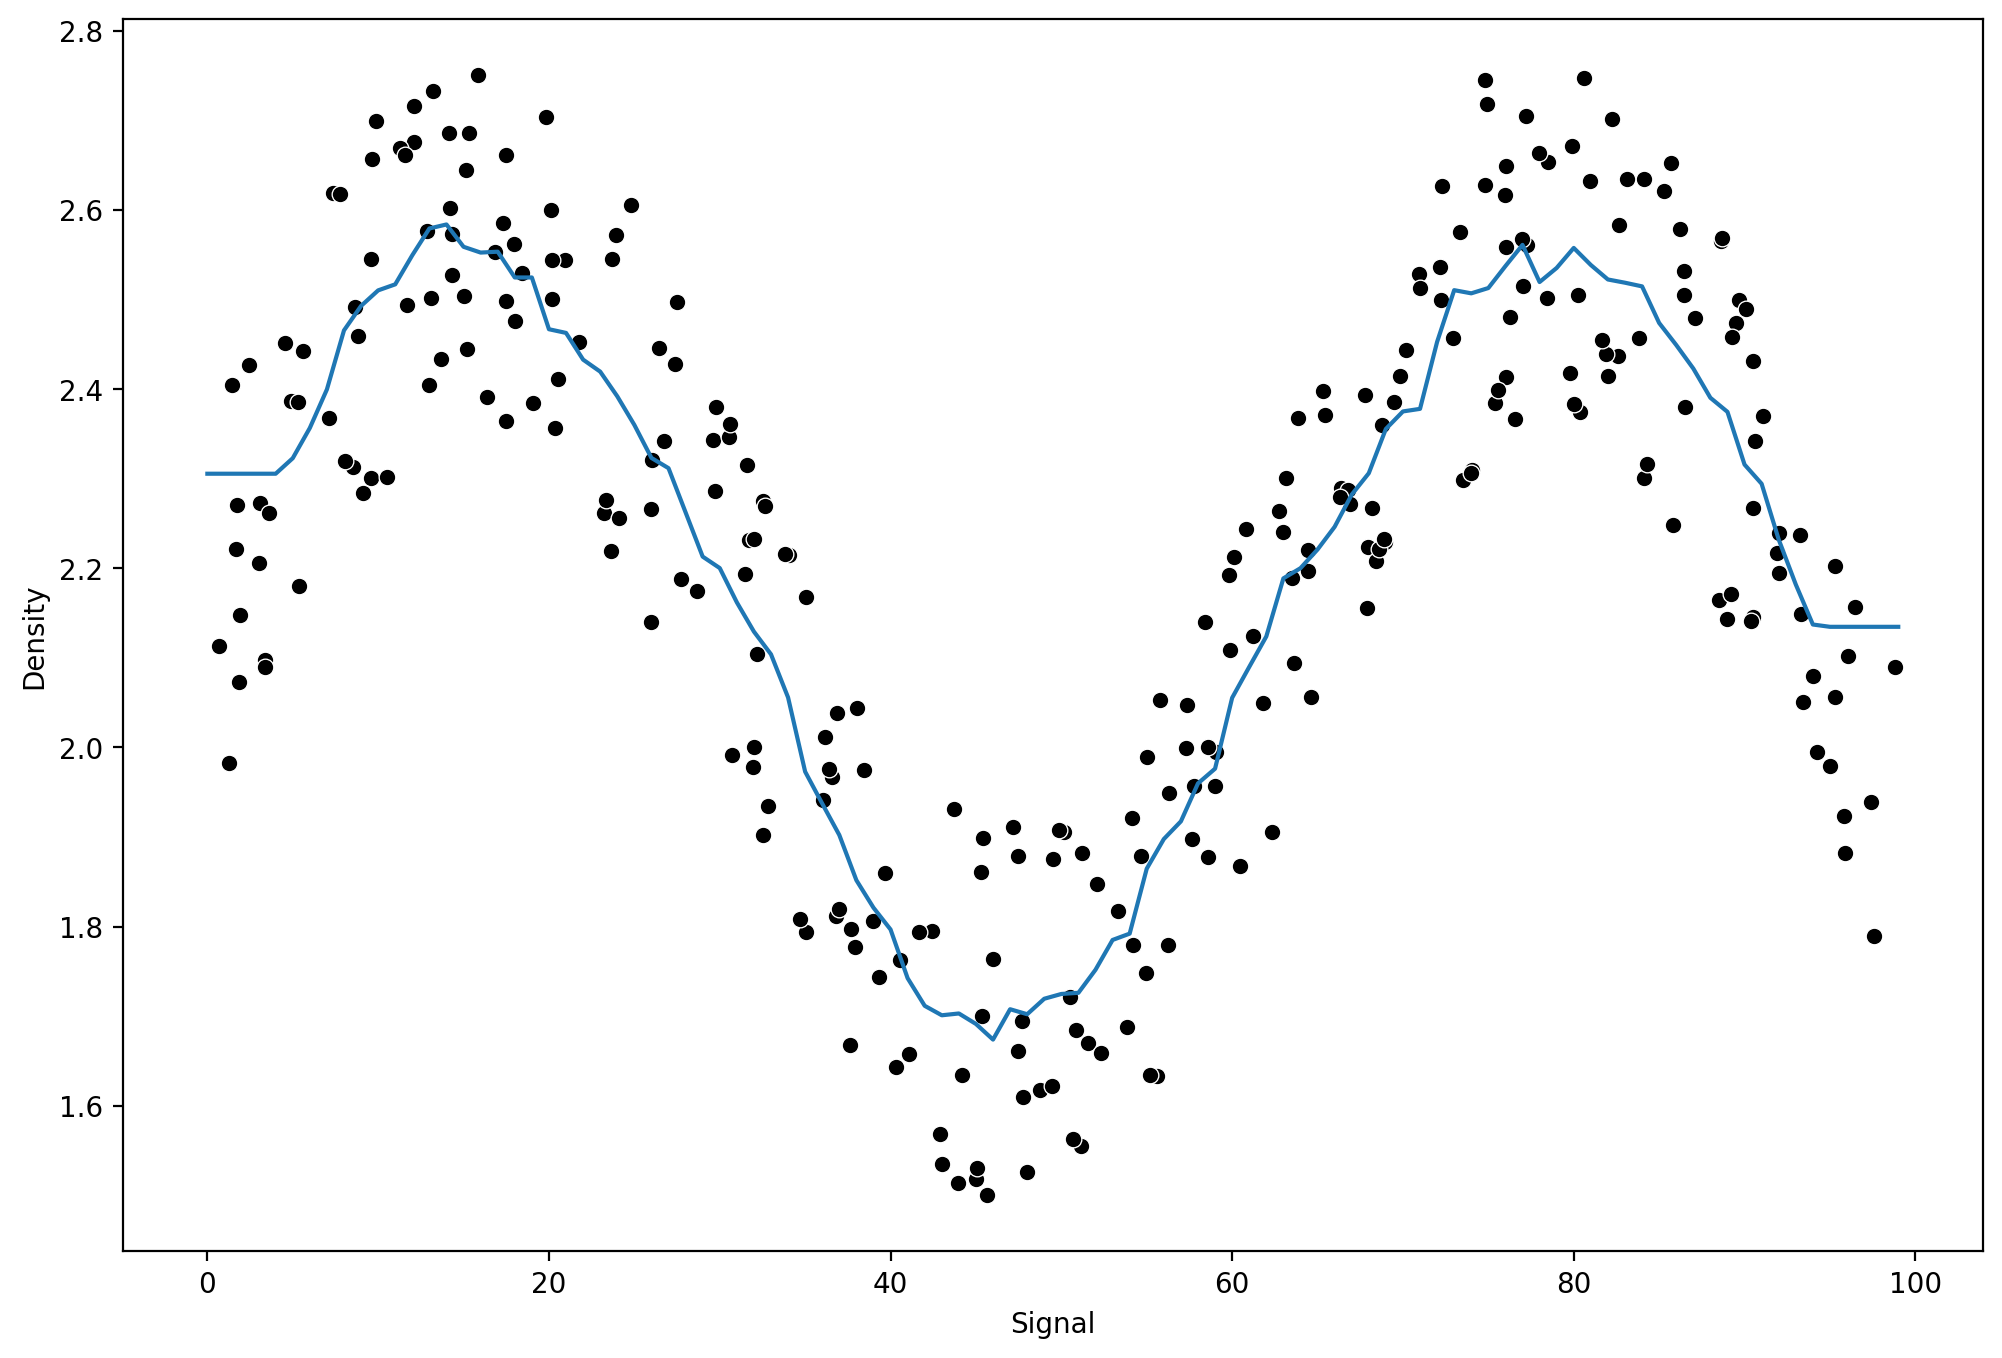

In [ ]:
k_values = [1,10,20]

for i in k_values:
  model = KNeighborsRegressor(n_neighbors=i)
  run_model(model,X_train,y_train,X_test,y_test)

In [ ]:
from sklearn.tree import DecisionTreeRegressor

RMSE: 0.1523487028635337
MAE: 0.11877297474442378


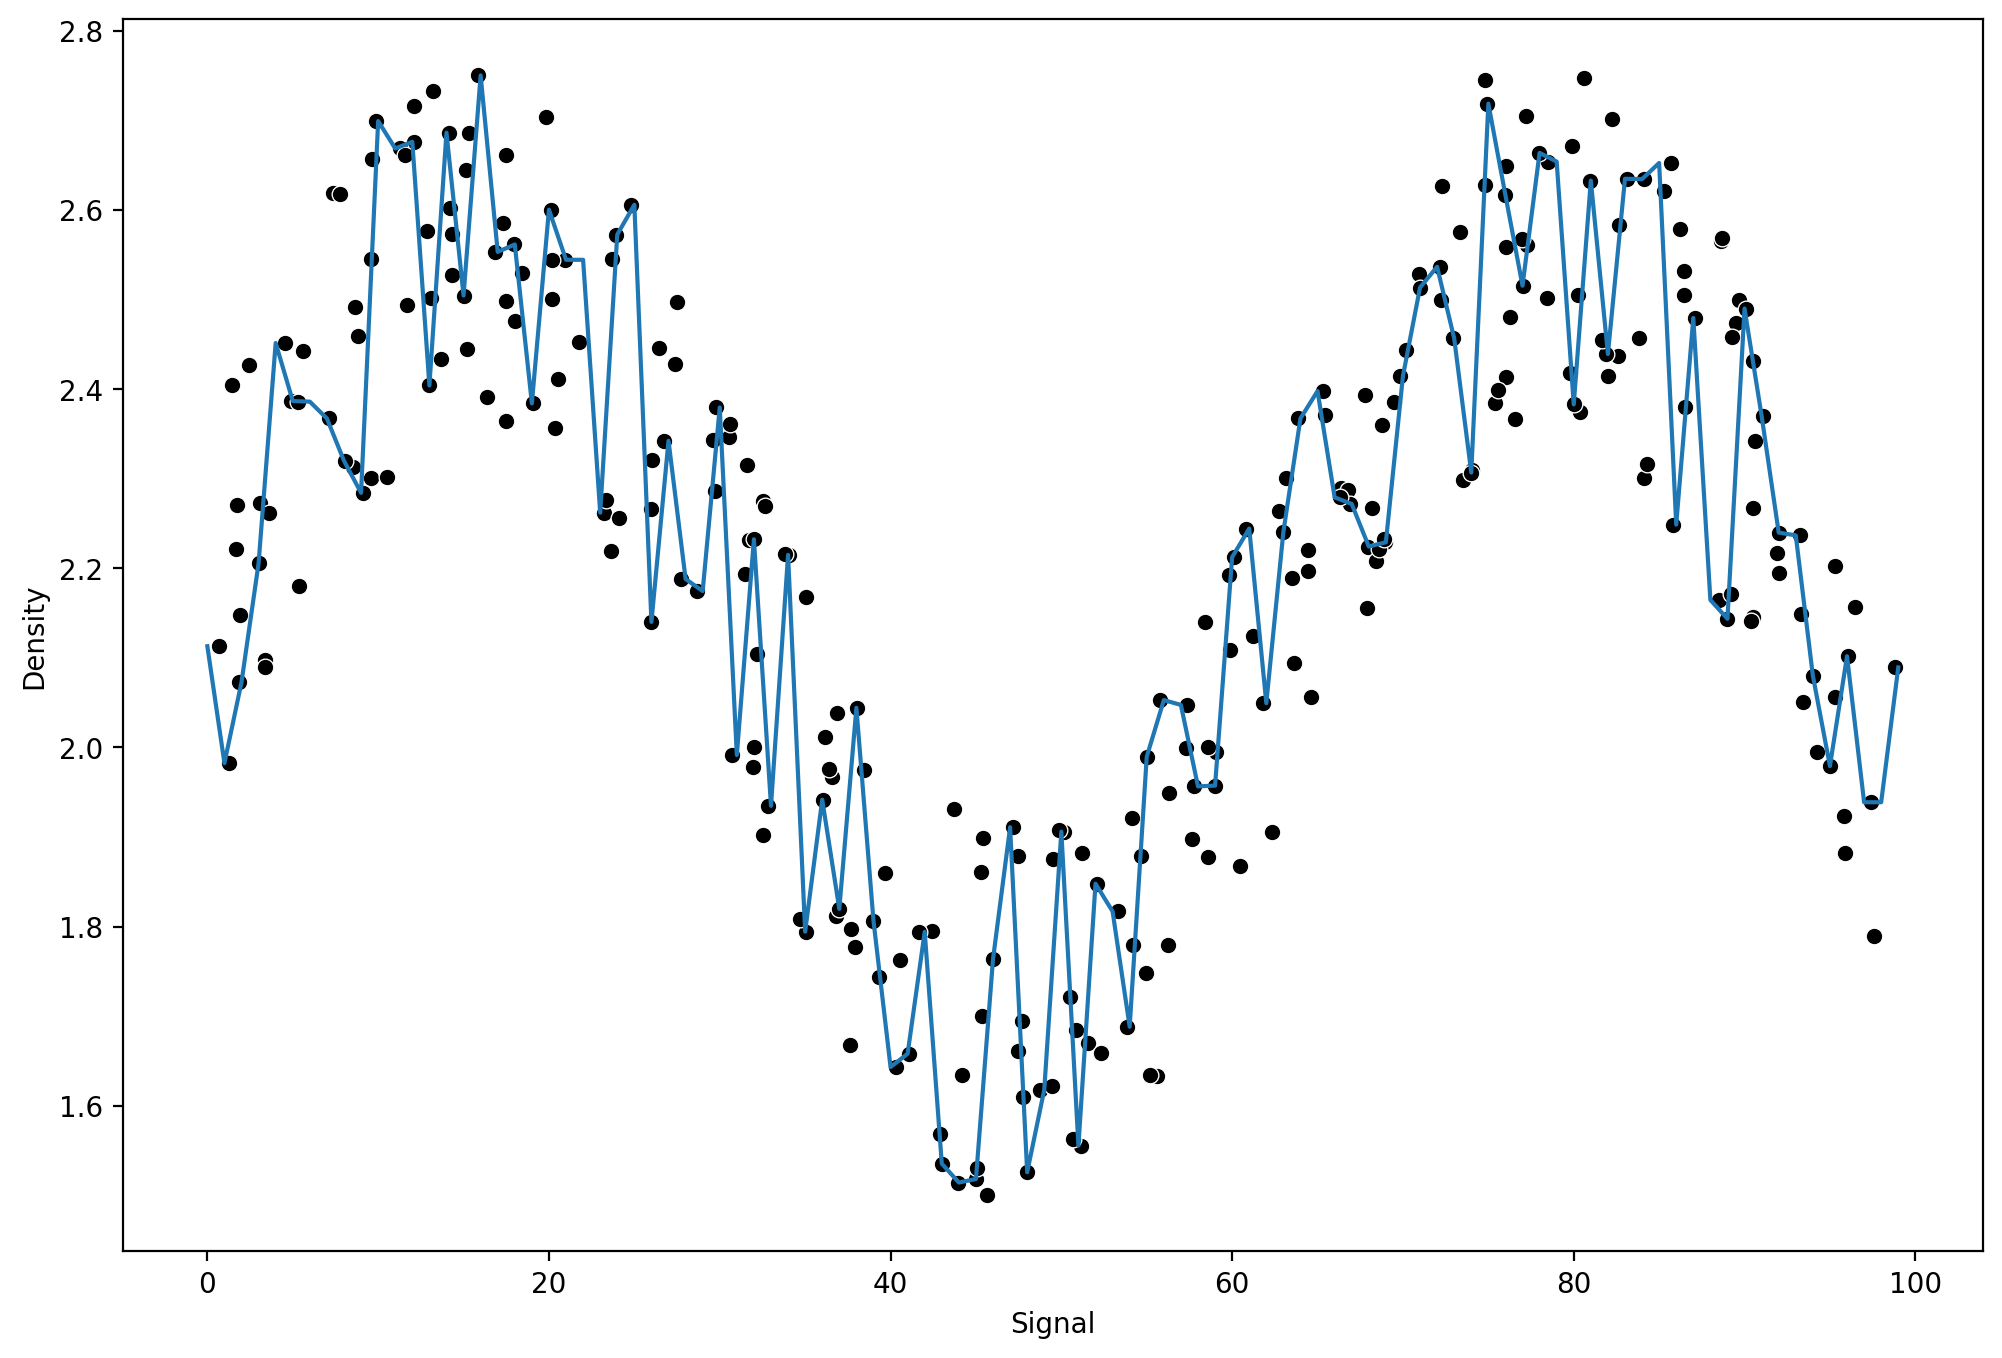

In [ ]:
model = DecisionTreeRegressor()
run_model(model,X_train,y_train,X_test,y_test)

In [ ]:
from sklearn.svm import SVR

In [ ]:
from sklearn.model_selection import GridSearchCV

RMSE: 0.12646999302047557
MAE: 0.10854210121349125


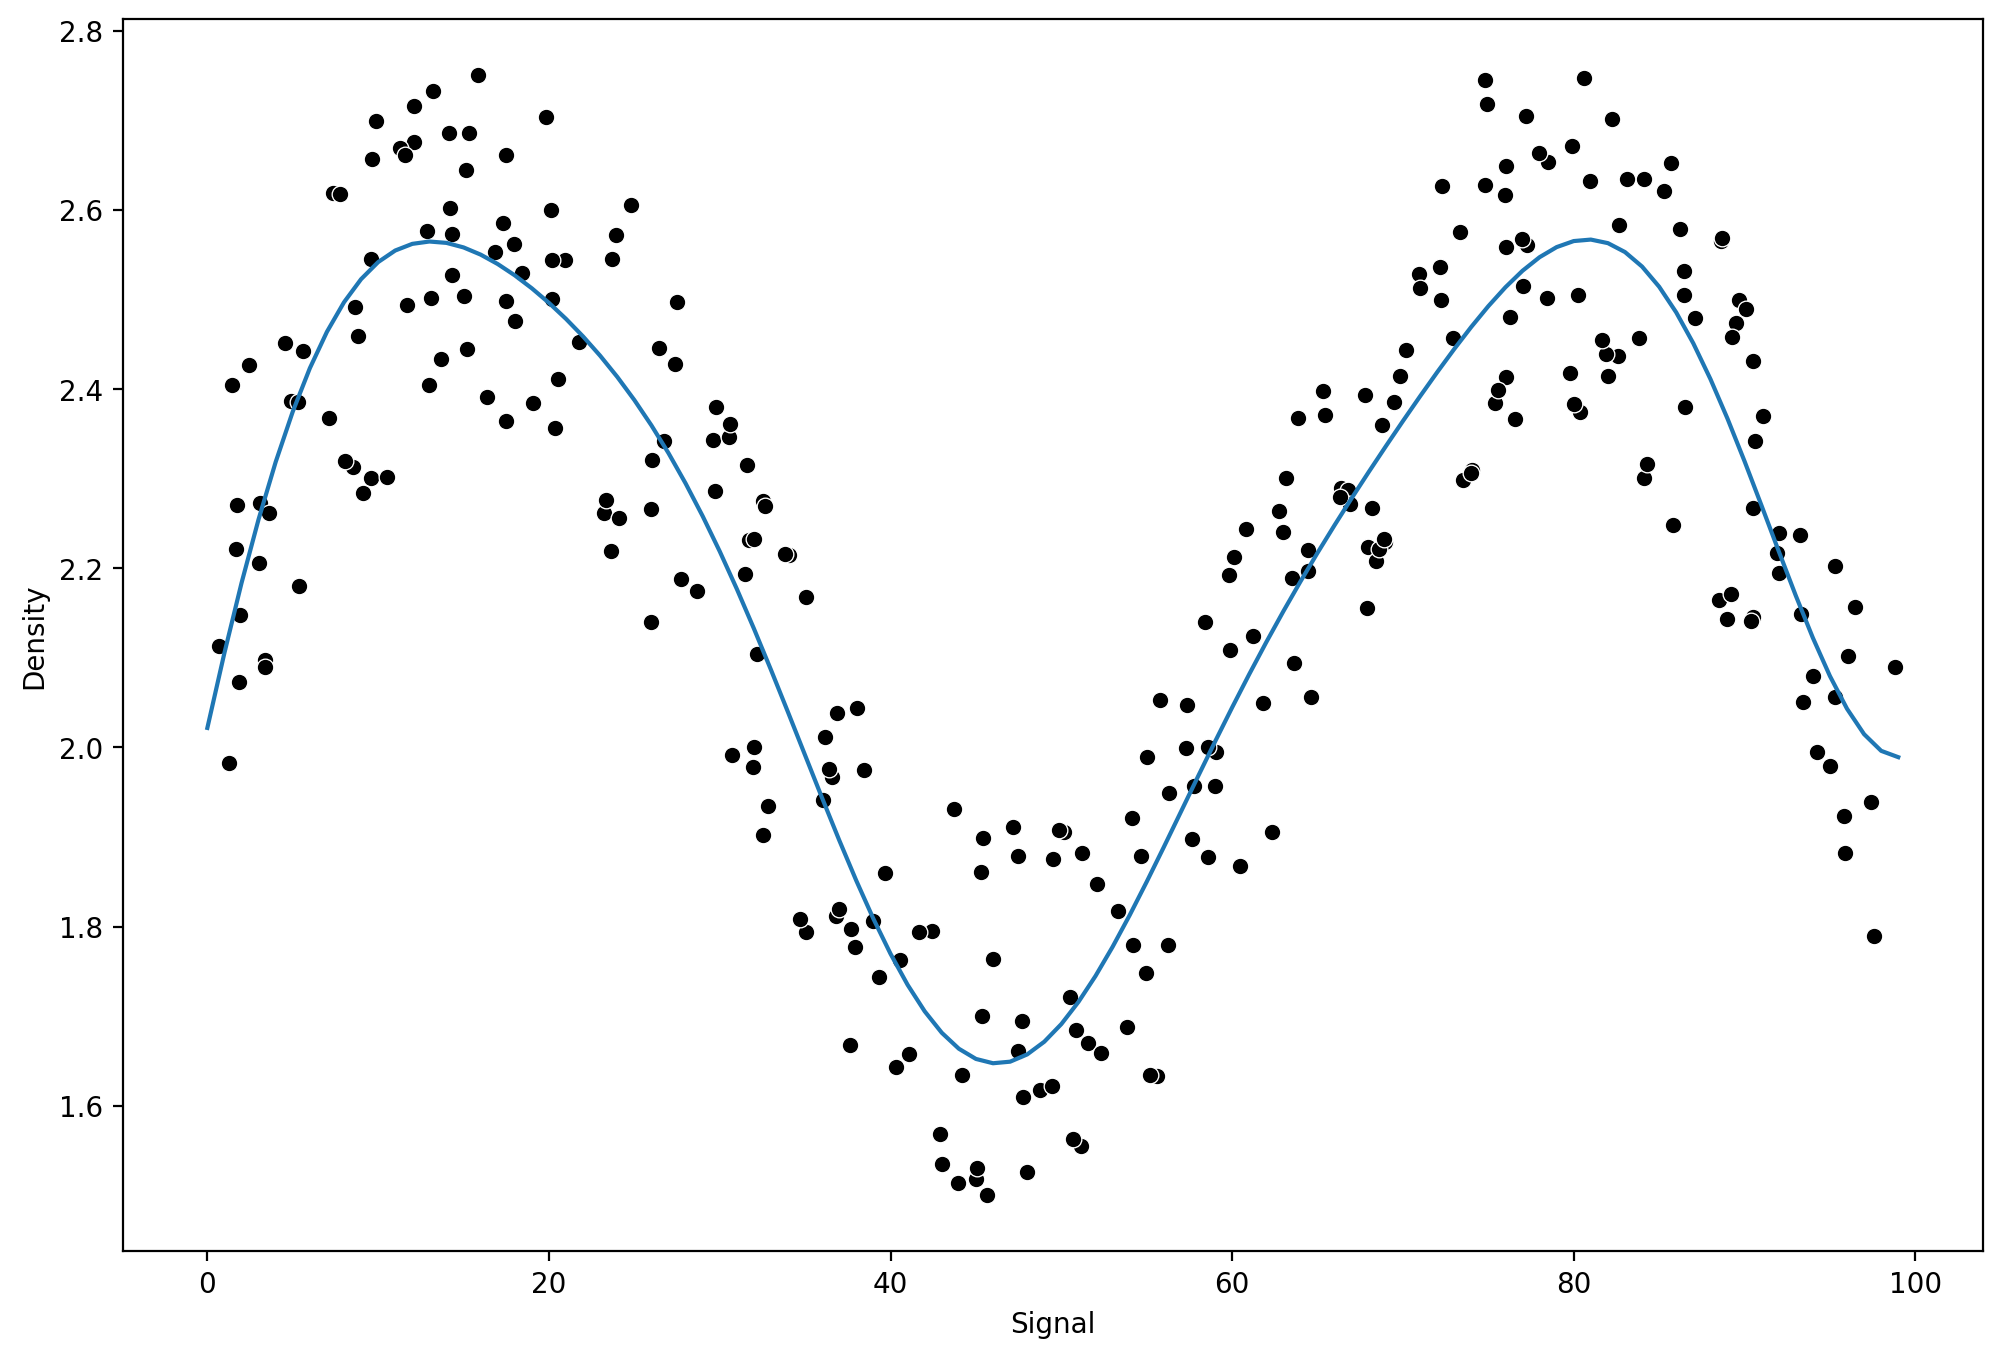

In [ ]:
svr = SVR()
param_grid = {"C":[0.1,1,10,100,1000],"gamma":["auto","scale"]}
grid = GridSearchCV(svr,param_grid)
run_model(grid,X_train,y_train,X_test,y_test)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rfr = RandomForestRegressor(n_estimators=10)

RMSE: 0.13282219272669094
MAE: 0.10993789341197097


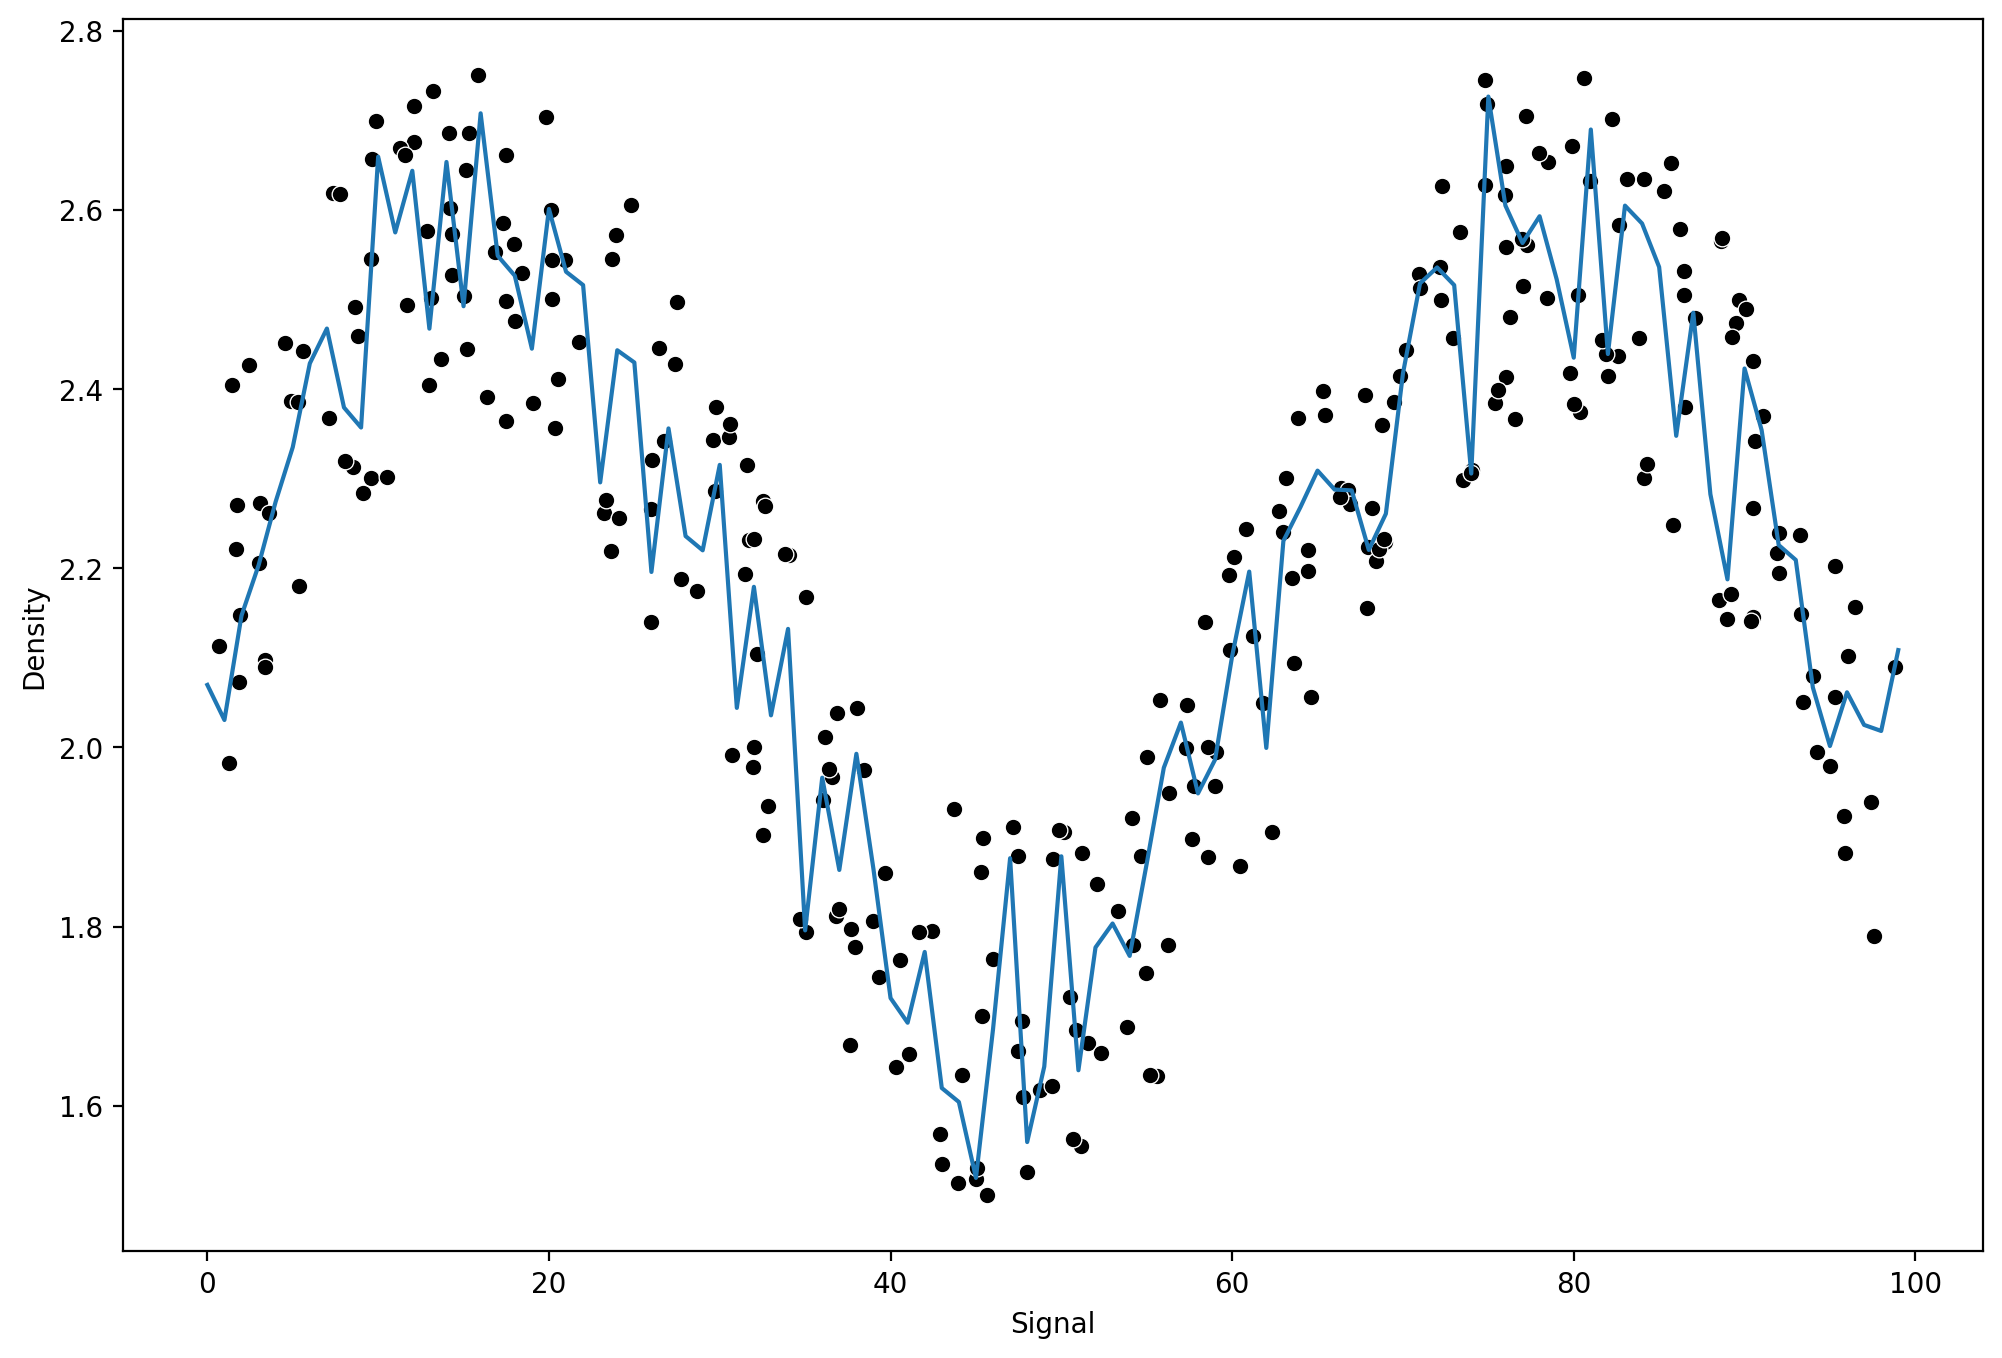

In [ ]:
run_model(rfr,X_train,y_train,X_test,y_test)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor

RMSE: 0.13294148649584667
MAE: 0.11318284854800689


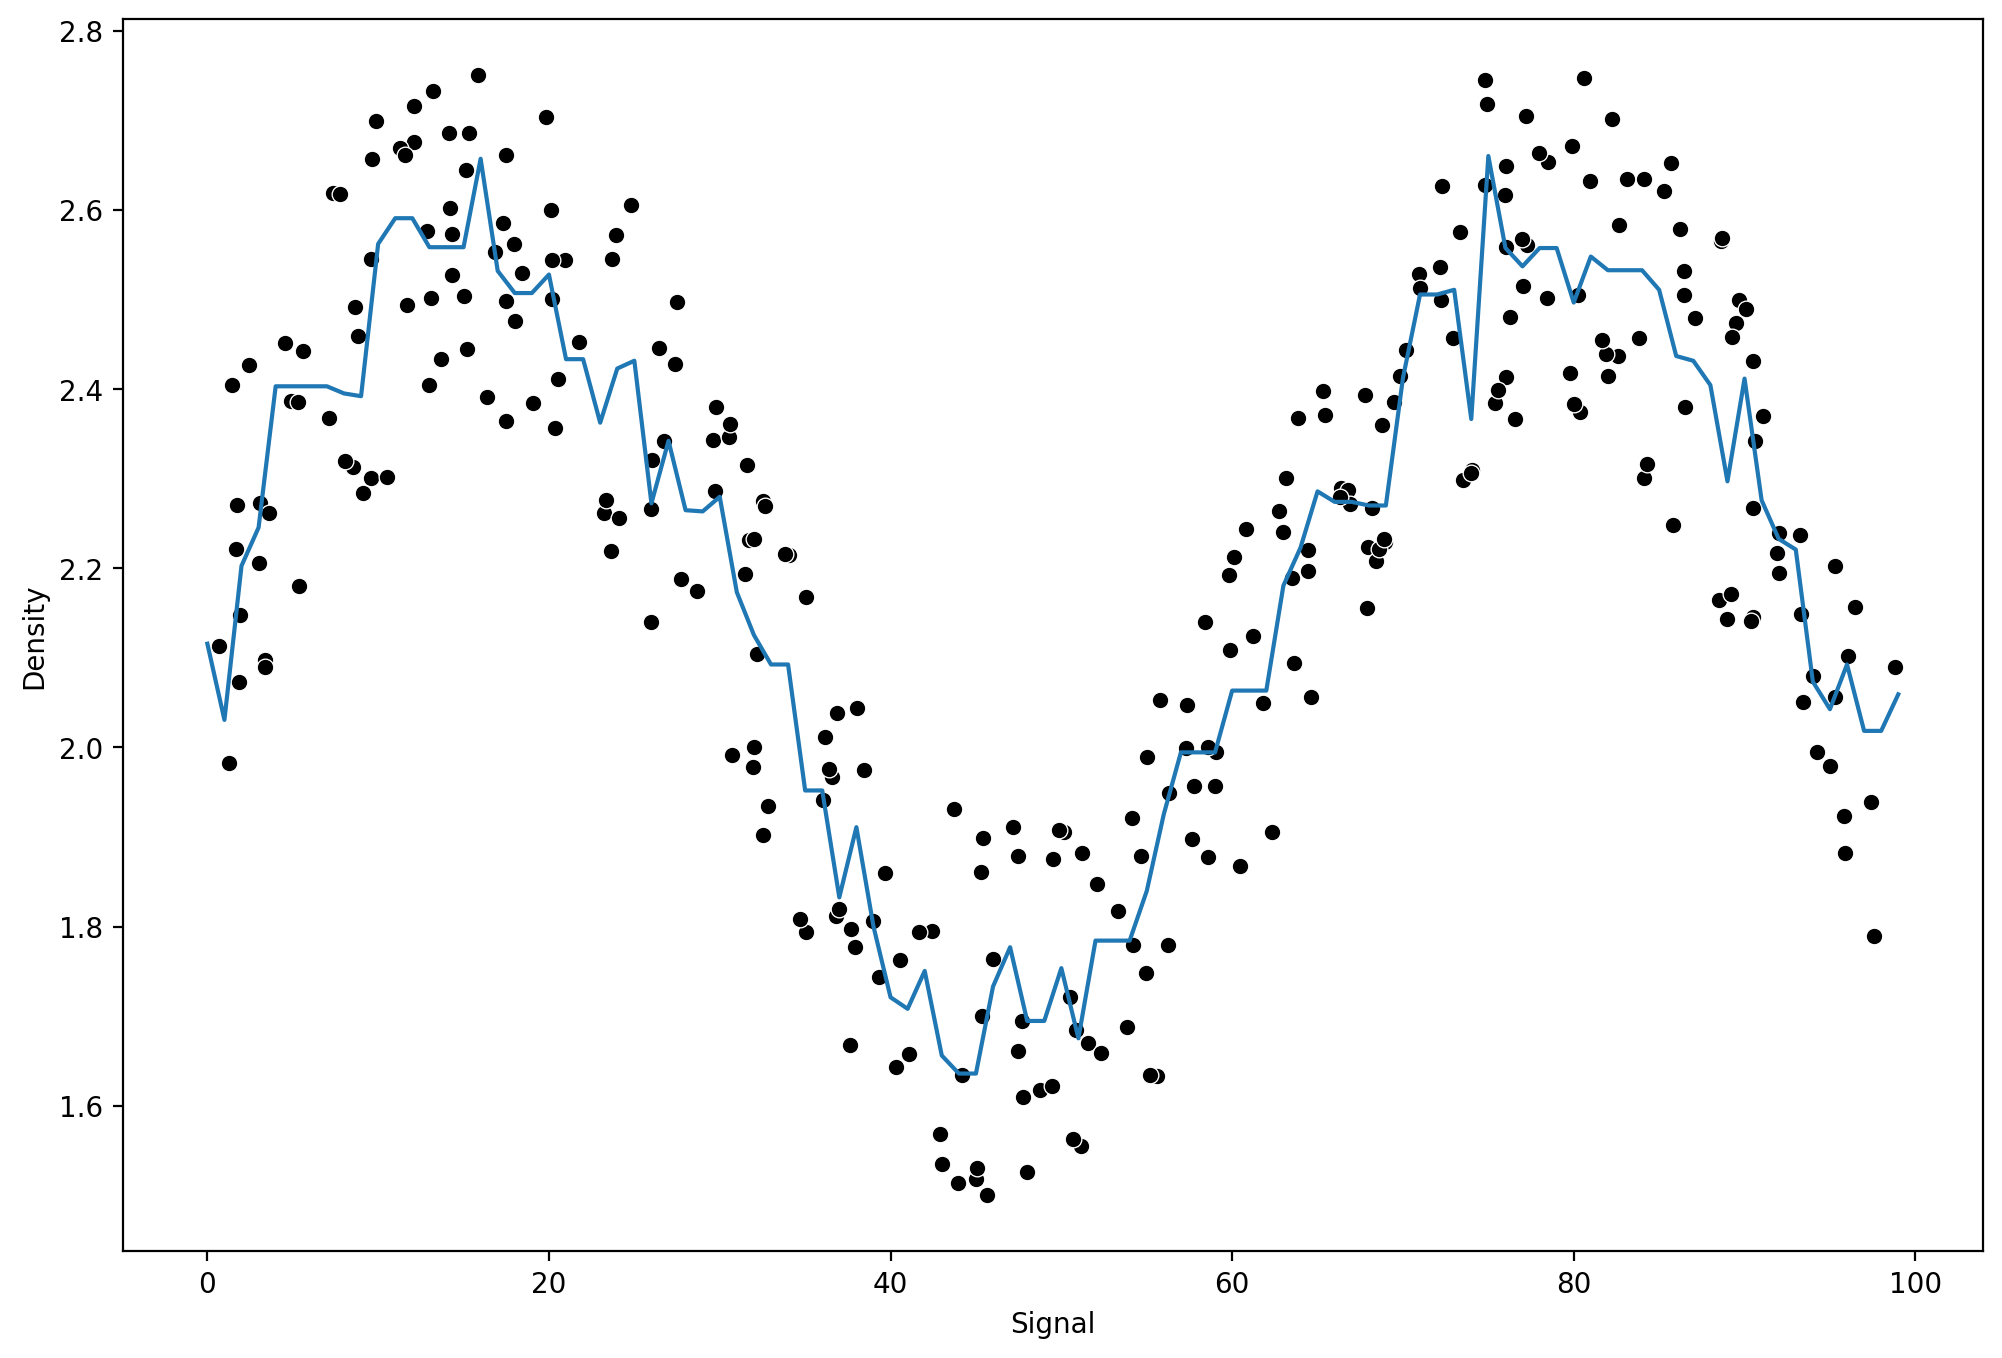

In [ ]:
model = GradientBoostingRegressor()
run_model(model,X_train,y_train,X_test,y_test)

RMSE: 0.1349038026459515
MAE: 0.11571970263889672


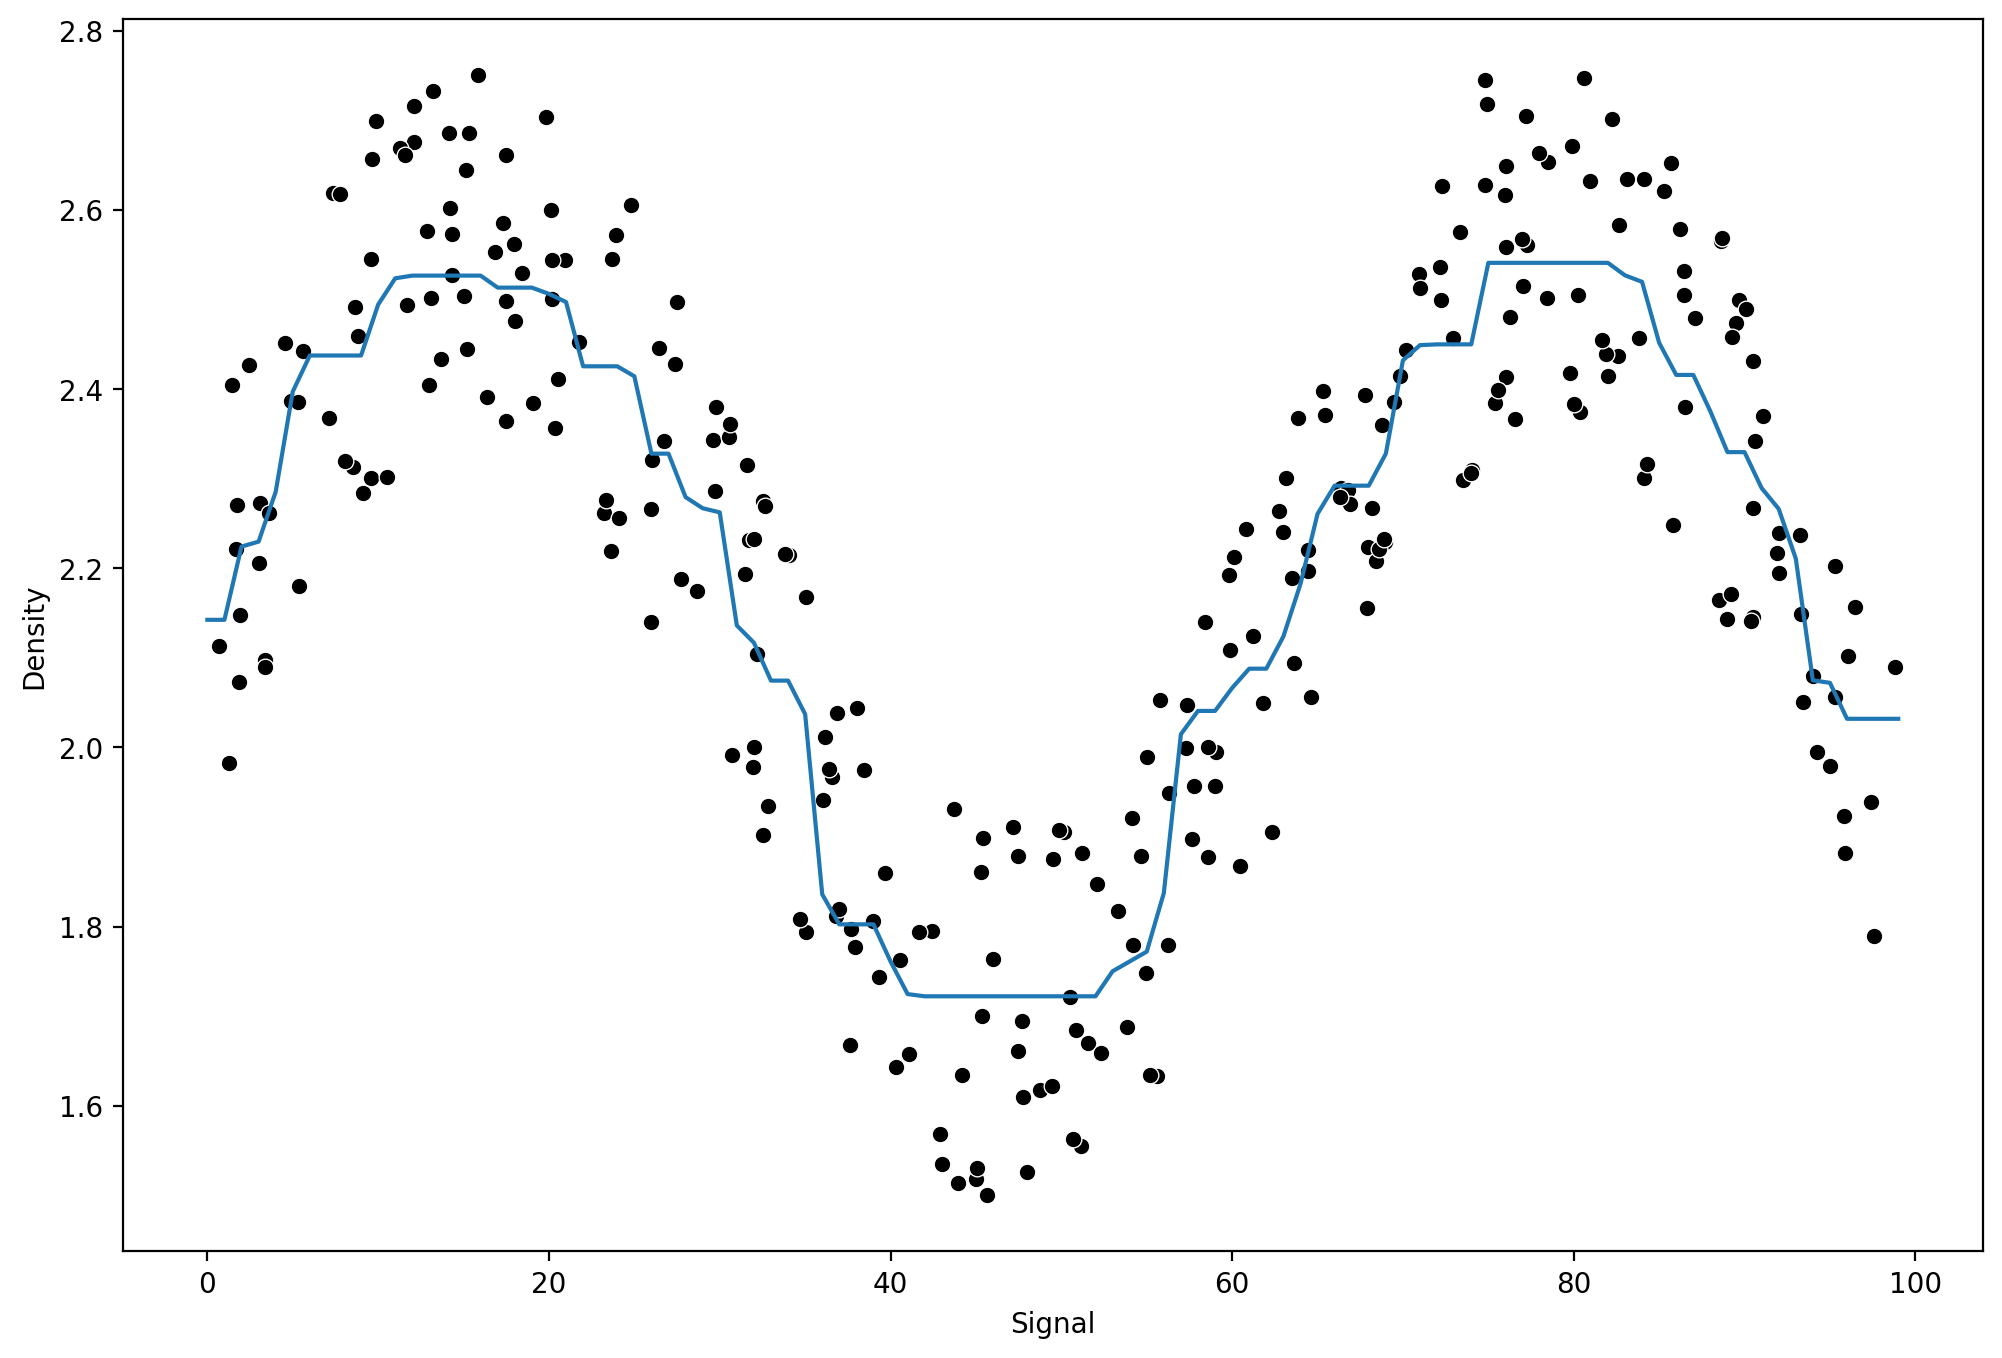

In [ ]:
model = AdaBoostRegressor()
run_model(model,X_train,y_train,X_test,y_test)